# **Diyabet Veri Setini Tanıyalım**


Bu veri seti, 10 farklı özelliği olan 442 hasta verisi içerir. Veri setindeki özellikler, hastaların yaş, cinsiyet, BMI (vücut kitle indeksi), kan basıncı ve 6 farklı kan değeri (serum kolesterol, serum LDL, serum HDL, serum trigliserit, insülin seviyesi, ve ortalama kan şekeri) gibi faktörlere dayanmaktadır. 

# **Amaç**

Amacımız, bu veri seti üzerinde bir yapay sinir ağı ve derin öğrenme uygulaması yapmak olacaktır.

**Öncelikle, gerekli kütüphaneleri import ediyoruz.**

In [ ]:
import numpy as np
import pandas as pd 
from numpy import loadtxt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import keras.utils.np_utils
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes

**Diyabet veri setini yüklüyoruz.**

In [ ]:
diabetes = load_diabetes()



In [ ]:
X = diabetes.data
y = diabetes.target


**Veri Setini eğitim ve test setlerine ayırıyoruz.**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Verileri normalleştiriyoruz.**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
y_mean = np.mean(y_train)
y_train_binary = np.where(y_train > y_mean, 1, 0)


**Artık modelimizi oluşturabiliriz.**





In [ ]:
from keras.layers import Dropout

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=10))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

**Modelimizi eğitiyoruz.**

In [ ]:
history = model.fit(X_train, y_train_binary, validation_split = 0.33, epochs =150, batch_size =10)

Epoch 1/150
24/24 [==============================] - 1s 9ms/step - loss: 0.7071 - accuracy: 0.5466 - val_loss: 0.6710 - val_accuracy: 0.5299
Epoch 2/150
24/24 [==============================] - 0s 3ms/step - loss: 0.6103 - accuracy: 0.6695 - val_loss: 0.6158 - val_accuracy: 0.6154
Epoch 3/150
24/24 [==============================] - 0s 3ms/step - loss: 0.5678 - accuracy: 0.7288 - val_loss: 0.5776 - val_accuracy: 0.6752
Epoch 4/150
24/24 [==============================] - 0s 3ms/step - loss: 0.5619 - accuracy: 0.7076 - val_loss: 0.5456 - val_accuracy: 0.7265
Epoch 5/150
24/24 [==============================] - 0s 2ms/step - loss: 0.4948 - accuracy: 0.7797 - val_loss: 0.5378 - val_accuracy: 0.7350
Epoch 6/150
24/24 [==============================] - 0s 3ms/step - loss: 0.4883 - accuracy: 0.7797 - val_loss: 0.5358 - val_accuracy: 0.7265
Epoch 7/150
24/24 [==============================] - 0s 3ms/step - loss: 0.5114 - accuracy: 0.7415 - val_loss: 0.5298 - val_accuracy: 0.7692
Epoch 8/150
2

In [ ]:
acc = model.evaluate(X_train, y_train_binary)
print("Loss:", acc[0], " Accuracy:", acc[1])

12/12 [==============================] - 0s 1ms/step - loss: 0.4266 - accuracy: 0.9037
Loss: 0.42664870619773865  Accuracy: 0.9036827087402344


**Son olarak eğitim başarısını görselleştiriyoruz.**

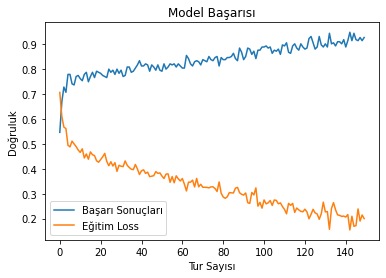

In [ ]:
import matplotlib.pyplot as plt 
plt.figure()
plt.title('Model Başarısı')
plt.ylabel('Doğruluk')
plt.xlabel('Tur Sayısı')
plt.plot(history.history["accuracy"], label="Başarı Sonuçları")
plt.plot(history.history["loss"],label="Eğitim Loss")
plt.legend()
plt.show()